Лабораторная работа 6
### Приближение функций
Вариант 28

Хачатрян Армен

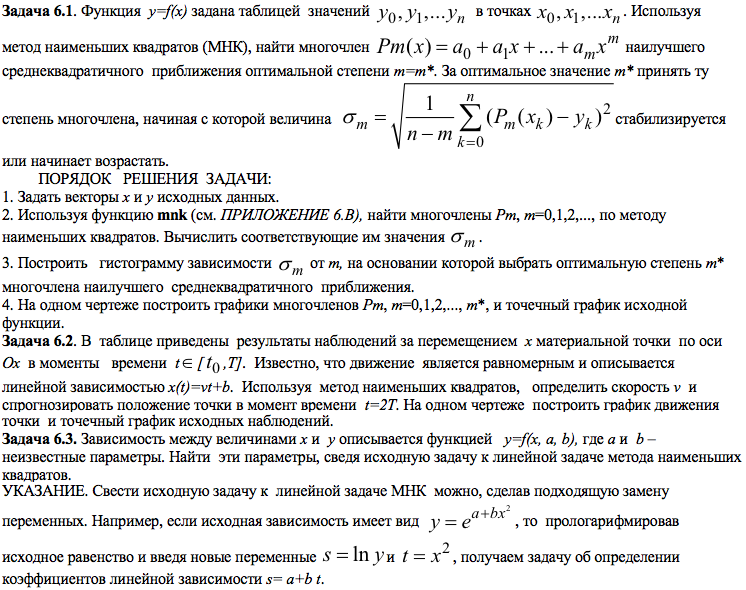

# Теория

### Линейная задача наименьших квадратов
$$ y_i = f(x_i) - \text{функция задана таблицей прибл. значений} $$
$$ y=\text{Ф}_m(x)=\sum_{k=0}^m a_k\varphi_k(x) - \text{ для аппроксимации функции используется линейная модель, где } a_k - \text{ параметры модели, а } $$
$$ \varphi_k(x) - \text{ базисные функции}$$
$$ \text{Полиномиальная модель } \varphi_k(x)=x^k $$
$$ y=\sum_{k=0}^m a_0x^k $$
$$ \text{Критерий наименьших квадратов: } $$
$$ \delta(Ф_m,y)=\sqrt{{1\over{n+1}}\sum_{i=0}^n (Ф_m(x_i)-y_i)^2} \to min $$

Начало

### Задача 6.1

Формулировка задания:

$x_{0} \rightarrow y_{0},x_{1} \rightarrow y_{1}, \dots, x_{n}\rightarrow y_{n} $

Найти $P_{m}(x) = a_{0}+a_{1}x+\dots+a_{m}x^{m}$, то есть подобрать $a_{0},\dots, a_{m}$ и выбрать оптимальный $m$, при котором достигается минимум следующей функции:
$$ \sigma_{m} = \sqrt{\frac{1}{n-m}\sum\limits_{k=0}^{n}(P_{m}(x_{k})-y_{k})^{2}}$$

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as polyval 
%matplotlib inline 

In [234]:
# Имеющиеся точки
X = [-1.3,-0.85,-0.4,0.05,0.5,0.95,1.4,1.85,2.3]
Y = [-1.762,0.955,3.614,4.707,3.721,0.402,-3.101,-2.489,9.868]
print(X)
print(Y)

[-1.3, -0.85, -0.4, 0.05, 0.5, 0.95, 1.4, 1.85, 2.3]
[-1.762, 0.955, 3.614, 4.707, 3.721, 0.402, -3.101, -2.489, 9.868]


In [235]:
len(X), len(Y)

(9, 9)

Для фиксированного m, чтобы найти $a_{0},\dots,a_{n}$, нужно решить следующую линейную систему
$$ \Gamma \vec{a} = \vec{b}, \quad \Gamma = P^{T}P, \space \vec{b} = P^{T}\vec{y} $$
$$ P - \text{матрица из базисных элементов, то есть } P_{ik} = \varphi_{k}(x_{i})= \begin{bmatrix}\text{для данной} \\ \text{задачи}\end{bmatrix} = x_{i}^{k}$$

$$ P = \begin{bmatrix}  \varphi_{0}(x_{0}), \varphi_{1}(x_{0}), \dots, \varphi_{m}(x_{0}) \\  \varphi_{0}(x_{1}), \varphi_{1}(x_{1}), \dots, \varphi_{m}(x_{1}) \\ \dots \\  \varphi_{0}(x_{n}), \varphi_{1}(x_{n}), \dots, \varphi_{m}(x_{n})\end{bmatrix}  = \begin{bmatrix}  1, x_{0}, \dots, x_{0}^{m} \\  1, x_{1}, \dots, x_{1}^{m} \\ \dots \\ 1, x_{n}, \dots, x_{n}^{m}\end{bmatrix} $$

In [236]:
# возращает матрицу P
def matrix_P(m,X):
    matrix = []
    for k in range(len(X)):
        row = []
        for i in range(m+1):
            row.append(X[k]**i)
        matrix.append(row)
    return np.array(matrix)

In [237]:
# Пример, m=2
P2= matrix_P(2,X)
P2

array([[  1.00000000e+00,  -1.30000000e+00,   1.69000000e+00],
       [  1.00000000e+00,  -8.50000000e-01,   7.22500000e-01],
       [  1.00000000e+00,  -4.00000000e-01,   1.60000000e-01],
       [  1.00000000e+00,   5.00000000e-02,   2.50000000e-03],
       [  1.00000000e+00,   5.00000000e-01,   2.50000000e-01],
       [  1.00000000e+00,   9.50000000e-01,   9.02500000e-01],
       [  1.00000000e+00,   1.40000000e+00,   1.96000000e+00],
       [  1.00000000e+00,   1.85000000e+00,   3.42250000e+00],
       [  1.00000000e+00,   2.30000000e+00,   5.29000000e+00]])

In [238]:
# Функция решает лин. систему и возращает вектор а коэффициентов многочлена
def get_a(P, Y):
    G = np.dot(np.transpose(P),P)
    b = np.dot(np.transpose(P),Y)
    return np.linalg.solve(G,b)

In [239]:
# Например, для случая, когда  m = 2
a2 = get_a(P2,Y)
a2

array([ 1.12765168,  0.41166314,  0.27178131])

In [240]:
# Будем работать с полином с помощью numpy
from numpy.polynomial.polynomial import polyval

In [241]:
# Зададим функцию сигма
def sigma(a,X,Y):
    S = 0
    for k in range(len(X)):
        S+=(polyval(X[k],a)-Y[k])**2
    return (S/(len(X)-(len(a)-1)))**(1/2)

In [242]:
# Например, все для того же двумерного случая
sigma(a2,X,Y)

4.3371904905157681

Теперь посмотрим все многочлены при $m<n$, то есть $m = 1,2,\dots,8$

In [243]:
# Функция для заданного m находит полином и вычисляет сигму
def get_sigma(m):
    P = matrix_P(m,X)
    a = get_a(P,Y)
    return sigma(a,X,Y)
# Функция находит полином по m
def get_a_from_m(m):
    P = matrix_P(m,X)
    a = get_a(P,Y)
    return a

In [244]:
m = np.array([t for t in range(1,9)])
m

array([1, 2, 3, 4, 5, 6, 7, 8])

In [245]:
# С помощью map применим функции ко всем элементам списка m
Sigma = list((map(get_sigma, m)))
A = list((map(get_a_from_m, m)))

In [246]:
# Выведем полученные значения
for i in range(len(m)):
    print("m = ", m[i])
    for k in range(len(A[i])):
        print(A[i][k],"* x^",k)
    print("sigma = ", Sigma[i])
    print('------------------------')

m =  1
1.42661111111 * x^ 0
0.683444444444 * x^ 1
sigma =  4.07141652024
------------------------
m =  2
1.12765167549 * x^ 0
0.41166313933 * x^ 1
0.271781305115 * x^ 2
sigma =  4.33719049052
------------------------
m =  3
4.22028369296 * x^ 0
-4.32810801529 * x^ 1
-4.06469733589 * x^ 2
2.89098576067 * x^ 3
sigma =  2.33595793725
------------------------
m =  4
5.11225489978 * x^ 0
0.753955706693 * x^ 1
-7.34893687322 * x^ 2
-0.704662608641 * x^ 3
1.79782418466 * x^ 4
sigma =  0.390929885192
------------------------
m =  5
4.73933787563 * x^ 0
0.901839269713 * x^ 1
-5.71834834852 * x^ 2
-1.24751185466 * x^ 3
0.981509528987 * x^ 4
0.326525862267 * x^ 5
sigma =  0.0474276823432
------------------------
m =  6
4.74048593753 * x^ 0
0.883796344228 * x^ 1
-5.72226390265 * x^ 2
-1.20891376746 * x^ 3
0.975507665444 * x^ 4
0.310569246201 * x^ 5
0.00531887202222 * x^ 6
sigma =  0.05441392767
------------------------
m =  7
4.71948372316 * x^ 0
0.820367100392 * x^ 1
-5.49621672489 * x^ 2
-1.0779

Text(0,0.5,'$\\sigma$')

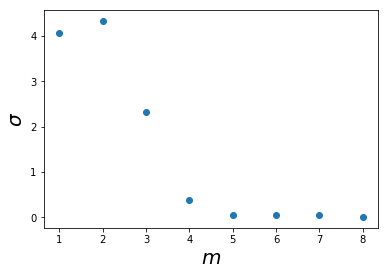

In [247]:
# Построим полученные ситгма
plt.scatter(m,Sigma)
plt.xlabel('$m$', Size = 20)
plt.ylabel('$\sigma$',Size = 20)

In [248]:
# m = 8 - на этом m достигается минимум сигма
np.argmin(Sigma)+1

8

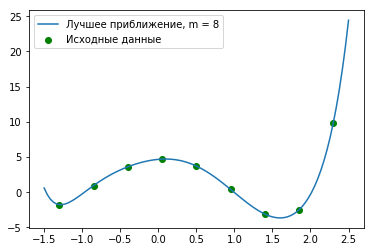

In [249]:
Z  = np.linspace(-1.5,2.5,100)
plt.scatter(X,Y,c='g', label = 'Исходные данные')
plt.plot(Z,polyval(Z,A[7]), label = 'Лучшее приближение, m = 8')
plt.legend()

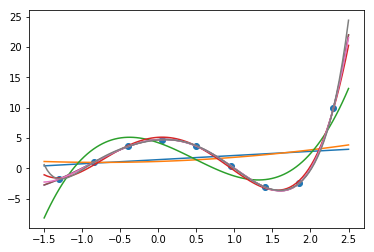

In [250]:
# На одном графике не очень информативно
for i in range(0,8):
    plt.plot(Z,polyval(Z,A[i]))
plt.scatter(X,Y)

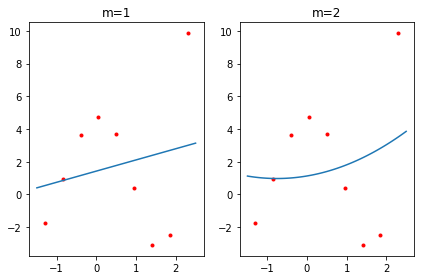

In [251]:
plt.subplot(1,2,1)
plt.title('m=1')
plt.scatter(X,Y,c='r', marker = '.')
plt.plot(Z,polyval(Z,A[0])) 

plt.subplot(1,2,2)
plt.title('m=2')
plt.scatter(X,Y,c='r', marker = '.')
plt.plot(Z,polyval(Z,A[1])) 

plt.tight_layout() 

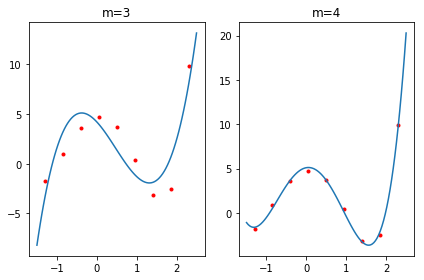

In [252]:
plt.subplot(1,2,1)
plt.title('m=3')
plt.scatter(X,Y,c='r', marker = '.')
plt.plot(Z,polyval(Z,A[2])) 

plt.subplot(1,2,2)
plt.title('m=4')
plt.scatter(X,Y,c='r', marker = '.')
plt.plot(Z,polyval(Z,A[3])) 

plt.tight_layout() 

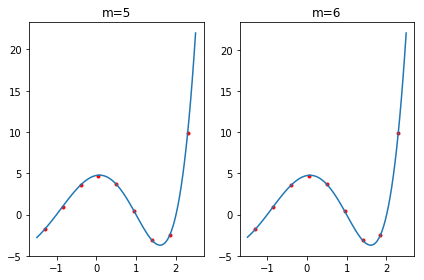

In [253]:
plt.subplot(1,2,1)
plt.title('m=5')
plt.scatter(X,Y,c='r', marker = '.')
plt.plot(Z,polyval(Z,A[4])) 

plt.subplot(1,2,2)
plt.title('m=6')
plt.scatter(X,Y,c='r', marker = '.')
plt.plot(Z,polyval(Z,A[5])) 

plt.tight_layout() 

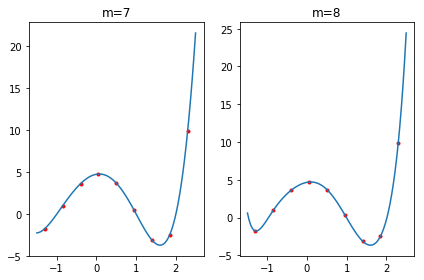

In [254]:
plt.subplot(1,2,1)
plt.title('m=7')
plt.scatter(X,Y,c='r', marker = '.')
plt.plot(Z,polyval(Z,A[6])) 

plt.subplot(1,2,2)
plt.title('m=8')
plt.scatter(X,Y,c='r', marker = '.')
plt.plot(Z,polyval(Z,A[7])) 

plt.tight_layout() 

### Задача 6.2

Формулировка задания: материальная точка движется равномерно, известно $t_0\rightarrow x_{0},t_1\rightarrow x_{1},\dots,t_n = T \rightarrow x_n $

1) $x(t) = vt + b, \space v,b - ?$

2) $x(2T) - ?$



In [255]:
# Начальные данные
t=[0,0.6,1.2,1.8,2.4,3,4.2,4.8,5.4,6]
x=[6.449,19.97,33.91,48.2,64.15,76.9,106.2,122.2,135.6,149]
len(x),len(t)

(10, 10)

In [256]:
# Воспользуемся функциями, написанными ранее
P_move = matrix_P(1,t)
a_move = get_a(P_move,x)

In [257]:
print('b = ', a_move[0],'v = ', a_move[1] )

b =  5.69371992654 v =  24.0014217937


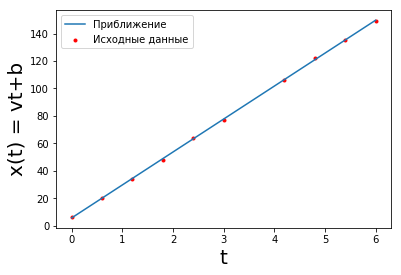

In [258]:
Q = np.linspace(0,6,100)
plt.scatter(t,x,c='r',marker = '.', label = 'Исходные данные')
plt.plot(Q,polyval(Q,a_move), label = 'Приближение')
plt.xlabel('t',Size = 20)
plt.ylabel('x(t) = vt+b',Size = 20)
plt.legend()

In [259]:
# Положение в момент t = 2T = 12
polyval(12,a_move)

293.71078145087245

### Задача 6.3

Формулировка задача:$x_{0}\rightarrow y_{0},\dots,x_{n}\rightarrow y_{n} $
$$y = \sqrt{ax+b}+2$$ 
Найти $a, b$, сведя исходную задачу к линейной: $s = at + b$

In [260]:
XX =[1,1.7,2.4,3.1,3.8,4.5,5.2,5.9,6.6,7.3,8]
YY = [4.0199,3.9404,3.8574,3.7706,3.6793,3.5827,3.4799,3.3693,3.249,3.1158,2.9644]

In [261]:
len(XX),len(YY)

(11, 11)

(0.64014336917562731,
 8.3598566308243711,
 2.8964483995584986,
 4.0878516004415006)

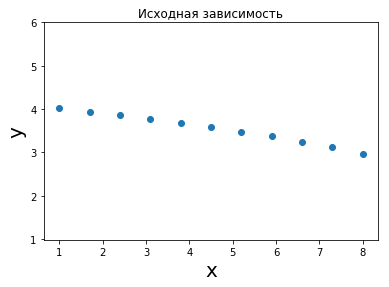

In [262]:
plt.scatter(XX,YY)
plt.xlabel('x',Size = 20)
plt.ylabel('y', Size = 20)
plt.title('Исходная зависимость')
plt.axis('equal')

Сделаем замену: $s = ({y-2})^{2},\space t = x$

In [263]:
# Пересчитаем исходные значения
XX = np.array(XX)
YY = np.array(YY)
s = (YY-2)**2
t = XX

Text(0.5,1,'После замены')

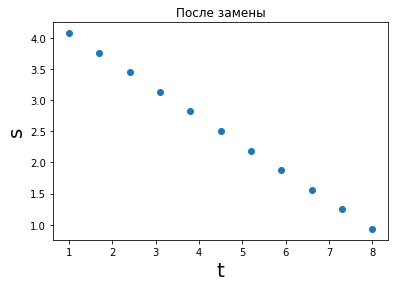

In [264]:
plt.scatter(t,s)
plt.xlabel('t',Size = 20)
plt.ylabel('s', Size = 20)
plt.title('После замены')

In [265]:
# Воспользуемся функциями, написанными ранее
P_1 = matrix_P(1,t)
par = get_a(P_1,s)

In [266]:
print('b = ', par[0], 'a = ', par[1])

b =  4.53002610032 a =  -0.450000556234


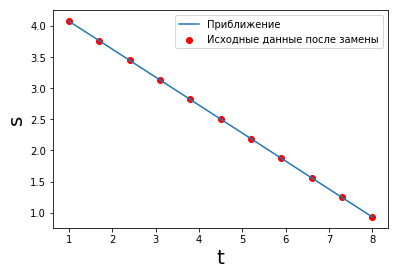

In [267]:
V = np.linspace(1,8,100)
plt.scatter(t,s,c='r',label = 'Исходные данные после замены')
plt.xlabel('t',Size = 20)
plt.ylabel('s', Size = 20)
plt.plot(V,polyval(V,par), label = 'Приближение')
plt.legend()

In [268]:
def y(x):
    return np.sqrt(par[1]*x+par[0])+2

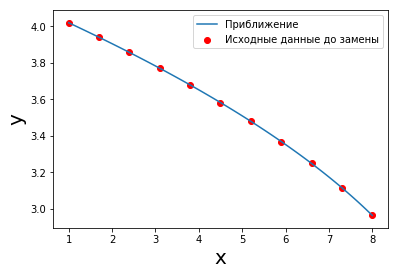

In [269]:
V = np.linspace(1,8,100)
plt.scatter(XX,YY,c='r',label = 'Исходные данные до замены')
plt.xlabel('x',Size = 20)
plt.ylabel('y', Size = 20)
plt.plot(V,y(V), label = 'Приближение')
plt.legend()

$$\text{Конец}$$